# AMSR2 Sea Ice Maps

Here we describe the method to include the AMSR2 sea ice maps as provided by University of Bremen. We grab them and convert the data set to netcdf every morning at 10 a.m. from the day before.

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

# local caching
kwds = {'simplecache': dict(
    cache_storage=os.environ['INTAKE_CACHE'], 
    same_names=True
)}

In [1]:
from ac3airborne.tools import get_amsr2_seaice as seaice

In [2]:
sic = seaice.get_amsr2_seaice('20220208')

Invalid MIT-MAGIC-COOKIE-1 key

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

/usr/local/lib/python3.8/dist-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


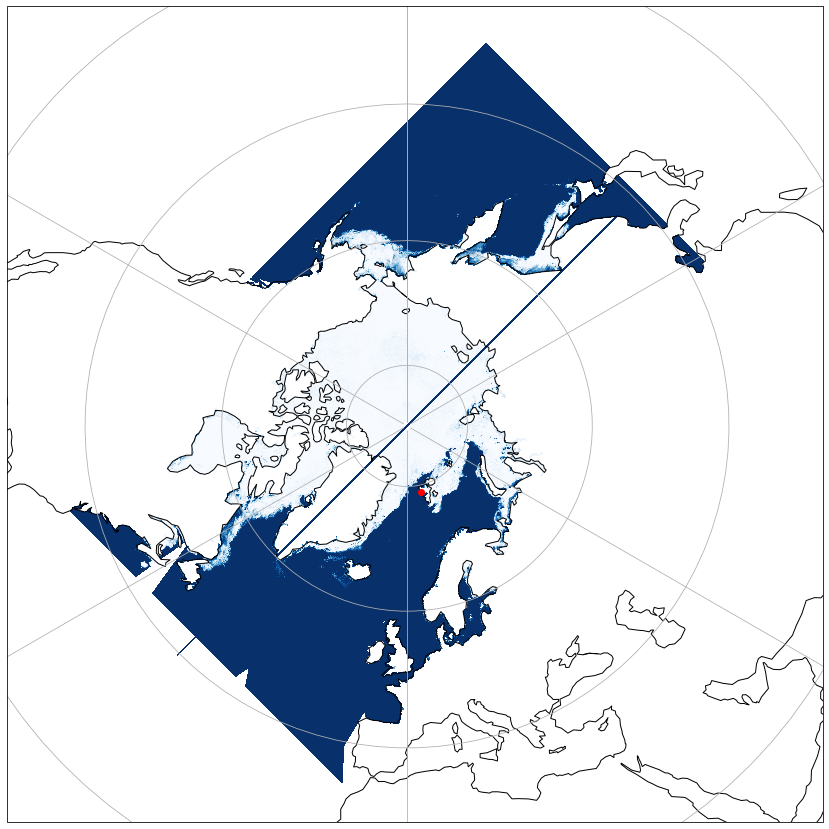

In [5]:
# prepare for plotting
proj   = ccrs.NorthPolarStereo()
#extent = (-5.0, 24.0, 78.0, 83.0)

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=proj)

ax.gridlines()
ax.coastlines()

#ax.scatter(sic.lon.values.ravel(),sic.lat.values.ravel(),c=sic.seaice.values.ravel(), s= 0.1,cmap='Blues_r',transform=ccrs.PlateCarree())
ax.pcolormesh(sic.lon,sic.lat,sic.seaice,cmap='Blues_r',transform=ccrs.PlateCarree())
nya_lat = 78.924444
nya_lon = 11.928611

ax.plot(nya_lon, nya_lat, 'ro', transform=ccrs.PlateCarree())